In [1]:
#Libraries

# Data manipulation
import pandas as pd
import numpy as np
import os
# Data visualization
import matplotlib.pyplot as plt

import seaborn as sns
from pandas.plotting import scatter_matrix

# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# For Missing Values
from sklearn.impute import SimpleImputer

# Processsing


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder



In [2]:
#Importing raw data


data_2016 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_16.csv")
data_2017 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_17.csv")
data_2018 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_18.csv")
data_2019 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_18.csv")
data_2020 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_20.csv")

# 1-EDA

In [3]:
#quick look at data
data_2016.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   14881.000000  14881.000000  14881.000000  14881.000000  14881.000000   
mean   194982.745985     24.930448    181.102547     75.428197     65.650427   
std     36810.259594      4.603521      6.701927      6.933863      7.095894   
min         2.000000     16.000000    155.000000     50.000000     44.000000   
25%    183644.000000     21.000000    176.000000     70.000000     61.000000   
50%    204240.000000     24.000000    181.000000     75.000000     66.000000   
75%    219905.000000     28.000000    186.000000     80.000000     70.000000   
max    231022.000000     45.000000    204.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  14881.000000  1.488100e+04   14881.000000              14881.000000   
mean      70.288690  1.766313e+06   14734.359250                  1.119145   
std        6.293664  4.172073e+06   25239.472577                  0.397214   
min       44.000000  0.000000e+00       0.000000                  1.000000   
25%       66.000000  2.500000e+05    1000.000000                  1.000000   
50%       70.000000  5.750000e+05    4000.000000                  1.000000   
75%       75.000000  1.400000e+06   20000.000000                  1.000000   
max       95.000000  1.110000e+08  550000.000000                  5.000000   

          weak_foot  ...     dribbling     defending        physic  \
count  14881.000000  ...  13263.000000  13263.000000  13263.000000   
mean       2.942477  ...     61.947448     50.995778     65.302873   
std        0.658013  ...     10.754742     17.676042      9.631893   
min        1.000000  ...     22.000000     15.000000     27.000000   
25%        3.000000  ...     56.000000     34.000000     59.000000   
50%        3.000000  ...     63.000000     56.000000     66.000000   
75%        3.000000  ...     69.000000     65.000000     72.000000   
max        5.000000  ...     95.000000     90.000000     89.000000   

         gk_diving  gk_handling   gk_kicking  gk_reflexes     gk_speed  \
count  1618.000000  1618.000000  1618.000000  1618.000000  1618.000000   
mean     66.355995    62.444376    61.019778    67.682324    43.754635   
std       7.691925     8.300535     8.286959     8.193498     8.375229   
min      36.000000    42.000000    29.000000    32.000000    12.000000   
25%      61.000000    56.250000    55.000000    62.000000    39.000000   
50%      66.000000    63.000000    60.000000    67.000000    44.000000   
75%      71.000000    68.000000    66.750000    73.000000    48.000000   
max      88.000000    87.000000    91.000000    90.000000    64.000000   

       gk_positioning  mentality_composure  
count      1618.00000                  0.0  
mean         63.18665                  NaN  
std           8.86955                  NaN  
min          37.00000                  NaN  
25%          57.00000                  NaN  
50%          63.00000                  NaN  
75%          69.00000                  NaN  
max          90.00000                  NaN  

[8 rows x 28 columns]

In [4]:
#Loading dataframes

data_2016 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_16.csv")
data_2017 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_17.csv")
data_2018 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_18.csv")
data_2019 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_18.csv")
data_2020 = pd.read_csv("/home/jc/Escritorio/Data_source_final_project/players_20.csv")


print(data_2016.shape)


data_2016['year'] = 2016
data_2017['year'] = 2017
data_2018['year'] = 2018
data_2019['year'] = 2019
data_2020['year'] = 2020

raw_data = pd.concat([data_2016,data_2017,data_2018,data_2019,data_2020] , ignore_index= True)




(14881, 104)


In [5]:
raw_data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/16...   
3     167495  https://sofifa.com/player/167495/manuel-neuer/...   
4     176580  https://sofifa.com/player/176580/luis-suarez/1...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   28  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   30  1985-02-05   
2          A. Robben                         Arjen Robben   31  1984-01-23   
3           M. Neuer                         Manuel Neuer   29  1986-03-27   
4          L. Suárez             Luis Alberto Suárez Díaz   28  1987-01-24   

   height_cm  weight_kg  nationality               club  ...   ldm   cdm  \
0        170         72    Argentina       FC Barcelona  ...  57+3  57+3   
1        185         80     Portugal        Real Madrid  ...  60+3  60+3   
2        180         80  Netherlands  FC Bayern München  ...  60+3  60+3   
3        193         92      Germany  FC Bayern München  ...   NaN   NaN   
4        182         85      Uruguay       FC Barcelona  ...  65+3  65+3   

    rdm   rwb    lb   lcb    cb   rcb    rb  year  
0  57+3  62+3  57+3  44+3  44+3  44+3  57+3  2016  
1  60+3  64+3  60+3  52+3  52+3  52+3  60+3  2016  
2  60+3  65+3  59+3  47+3  47+3  47+3  59+3  2016  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN  2016  
4  65+3  67+3  64+3  58+3  58+3  58+3  64+3  2016  

[5 rows x 105 columns]

In [6]:
#Saving visualisation for tableau

mainpath = "/home/jc/Escritorio/Data_source_final_project/"
filename ="raw_data."
fullpath = os.path.join(mainpath, filename)
raw_data.to_csv(fullpath+"csv", index=False)

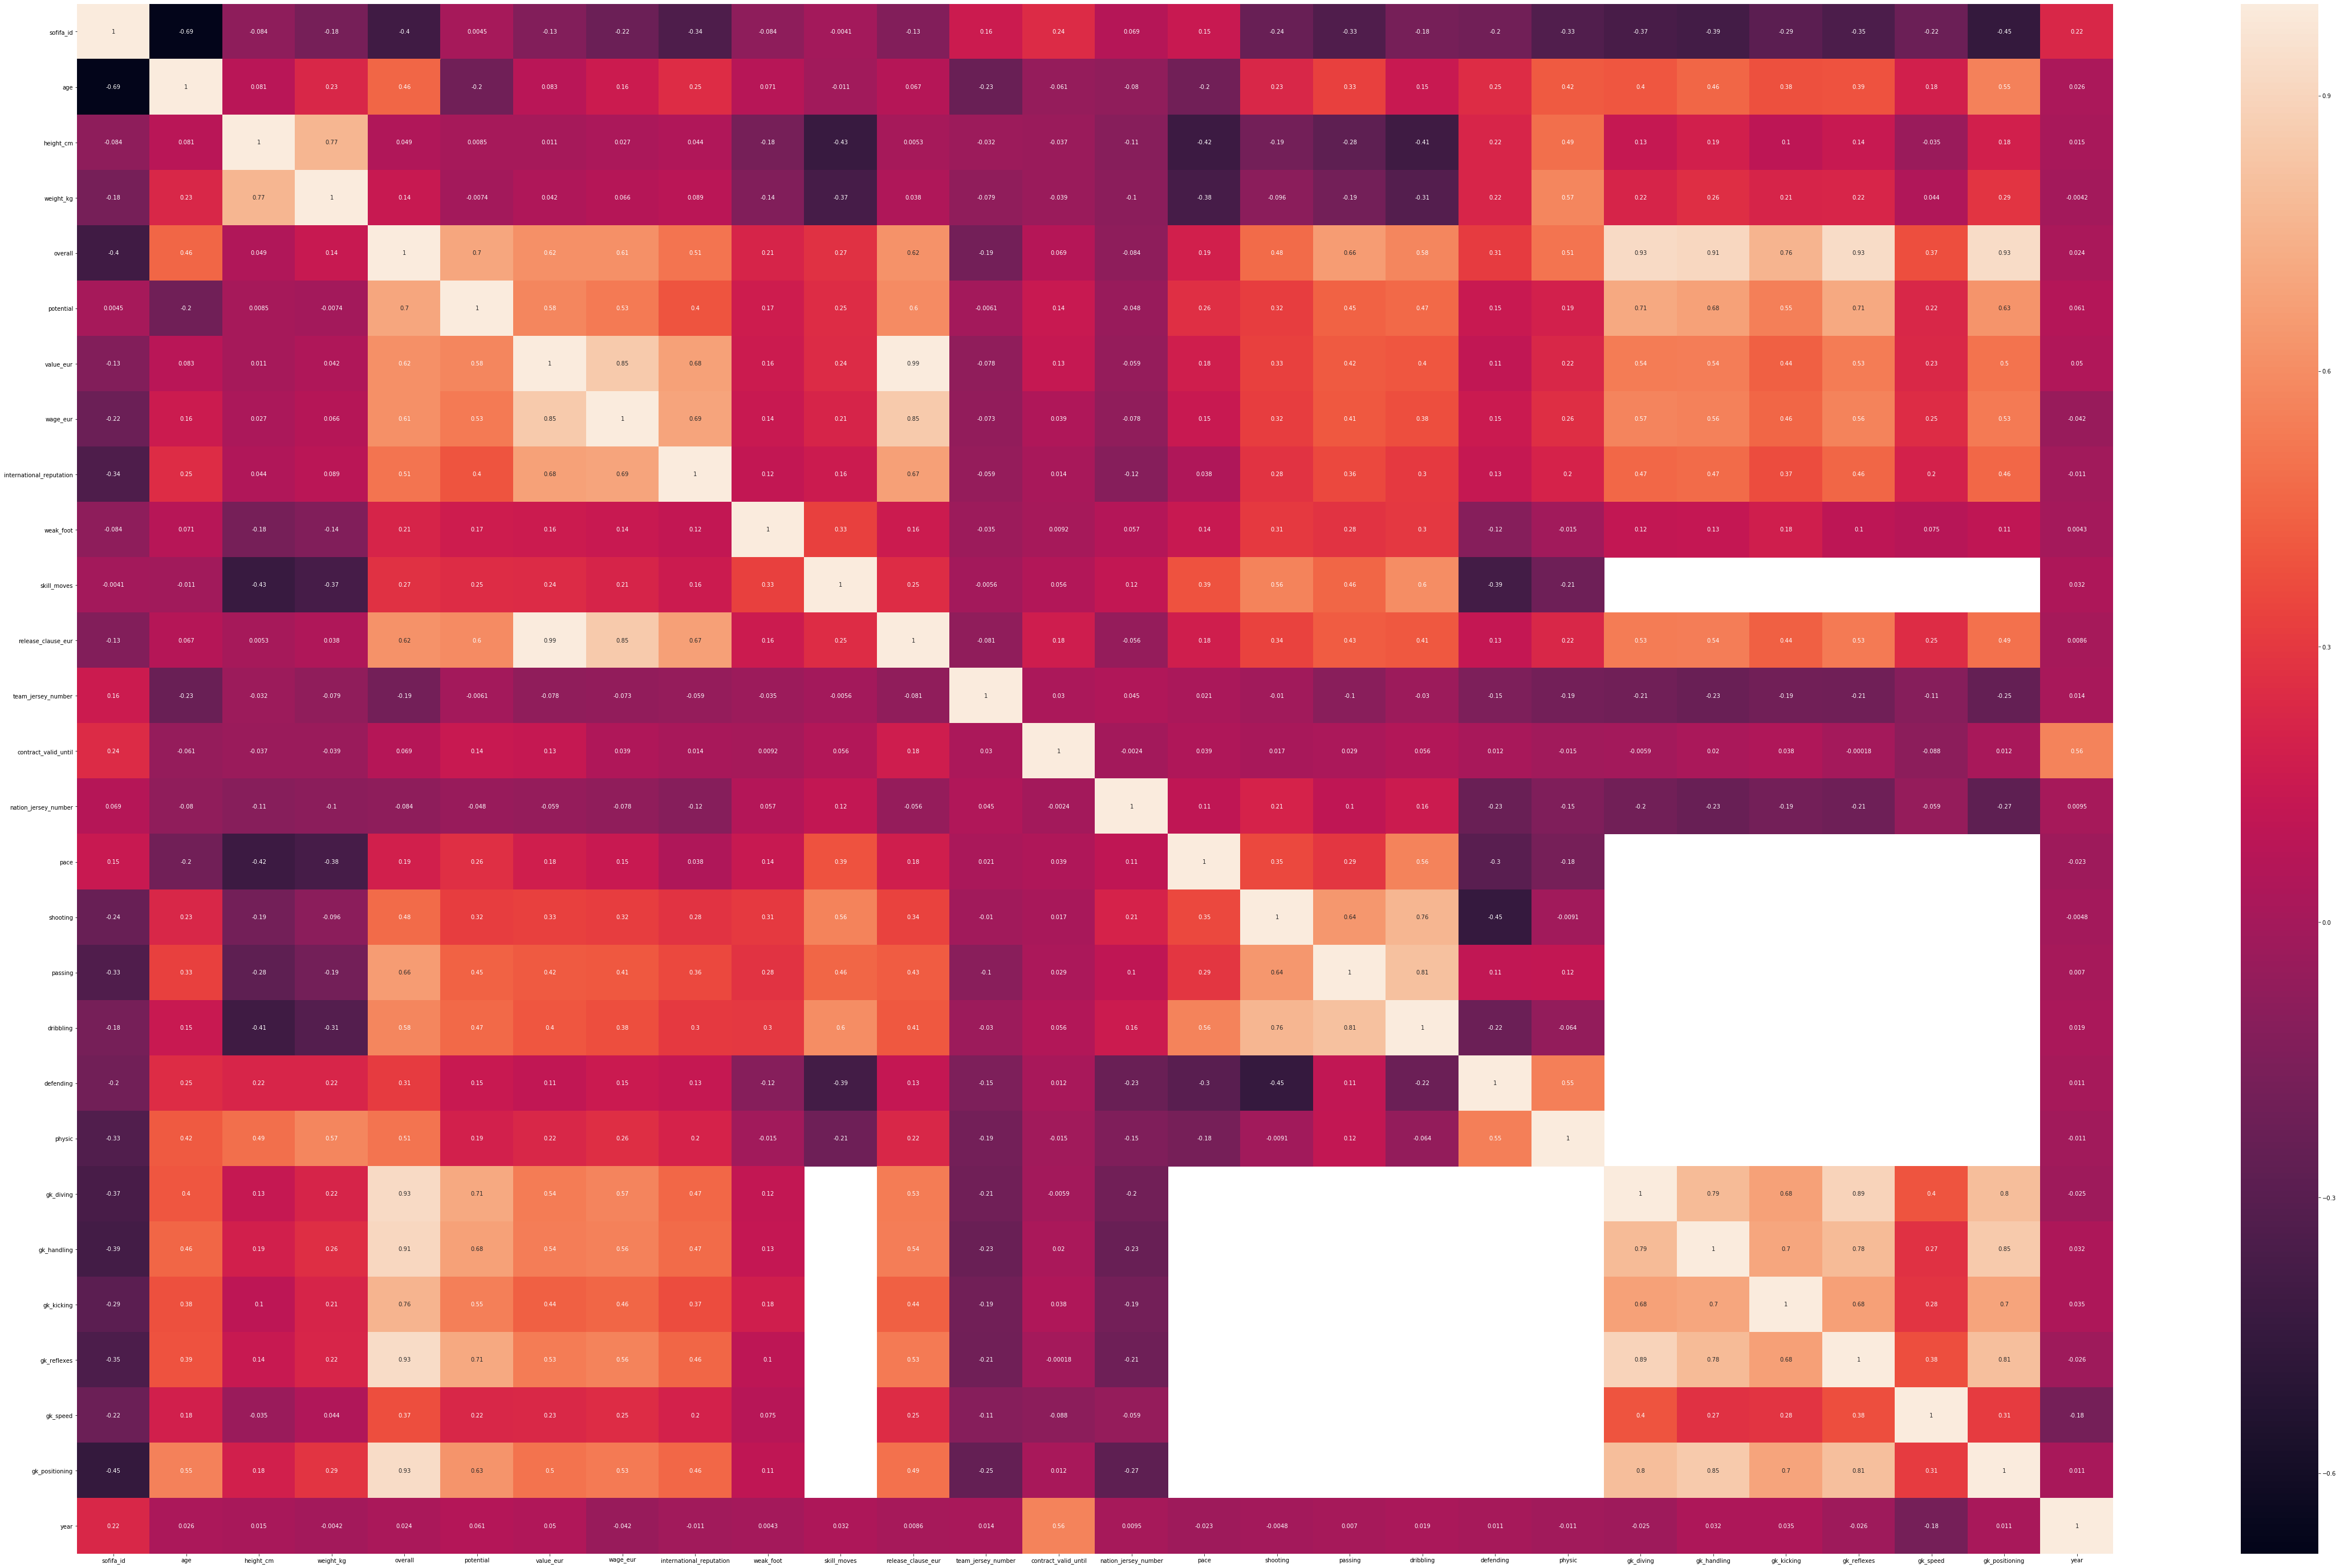

In [7]:
#looking for correlations on numeric variables

plt.figure(figsize=(80, 50))

sns_plot = sns.heatmap ( raw_data.corr(), annot = True )



In [8]:
#saving the plot for future visualisation

fig = sns_plot.get_figure()
fig.savefig("output.png")

# 2- Data Wrangling : cleaning data to apply the model

In [9]:
pd.options.display.max_columns = None
raw_data.select_dtypes(include =['object'] ).head()

player_url         short_name  \
0  https://sofifa.com/player/158023/lionel-messi/...           L. Messi   
1  https://sofifa.com/player/20801/c-ronaldo-dos-...  Cristiano Ronaldo   
2  https://sofifa.com/player/9014/arjen-robben/16...          A. Robben   
3  https://sofifa.com/player/167495/manuel-neuer/...           M. Neuer   
4  https://sofifa.com/player/176580/luis-suarez/1...          L. Suárez   

                             long_name         dob  nationality  \
0       Lionel Andrés Messi Cuccittini  1987-06-24    Argentina   
1  Cristiano Ronaldo dos Santos Aveiro  1985-02-05     Portugal   
2                         Arjen Robben  1984-01-23  Netherlands   
3                         Manuel Neuer  1986-03-27      Germany   
4             Luis Alberto Suárez Díaz  1987-01-24      Uruguay   

                club player_positions preferred_foot      work_rate  \
0       FC Barcelona           RW, CF           Left     Medium/Low   
1        Real Madrid           LW, LM          Right       High/Low   
2  FC Bayern München       RM, LM, RW           Left       High/Low   
3  FC Bayern München               GK          Right  Medium/Medium   
4       FC Barcelona               ST          Right    High/Medium   

    body_type real_face                                        player_tags  \
0       Messi       Yes  #Speedster, #Dribbler, #FK Specialist, #Acroba...   
1  C. Ronaldo       Yes  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
2      Normal       Yes  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
3      Normal       Yes                                                NaN   
4      Normal       Yes                       #Acrobat, #Clinical Finisher   

  team_position loaned_from      joined nation_position  \
0            RW         NaN  2004-07-01              RW   
1            LM         NaN  2009-07-01              ST   
2           SUB         NaN  2009-08-28              RW   
3            GK         NaN  2011-07-01              GK   
4            ST         NaN  2014-07-11             NaN   

                                       player_traits attacking_crossing  \
0  Finesse Shot, Speed Dribbler (CPU AI Only), On...               80-4   
1  Power Free-Kick, Flair, Long Shot Taker (CPU A...               82-1   
2  Diver, Injury Prone, Avoids Using Weaker Foot,...                 80   
3                         GK Long Throw, 1-on-1 Rush              15-10   
4  Diver, Beat Offside Trap, Flair, Technical Dri...                 77   

  attacking_finishing attacking_heading_accuracy attacking_short_passing  \
0                93-1                         71                    88-1   
1                  95                         86                    81-1   
2                  85                       51-1                    85-1   
3               13-12                         25                    48+6   
4                90-1                       77+2                      82   

  attacking_volleys skill_dribbling skill_curve skill_fk_accuracy  \
0                85              96          89                90   
1                87              93          88              77-2   
2                86              93        86+1                83   
3             11-14            16-9       14-11             11-14   
4              87+2            88-2          86                84   

  skill_long_passing skill_ball_control movement_acceleration  \
0               79+3                 96                  95-1   
1                 72               91-1                    91   
2               74-2               90-2                  92-1   
3               47+6                 31                    58   
4                 64               91+2                    88   

  movement_sprint_speed movement_agility movement_reactions movement_balance  \
0                    90             92-2               92-2               95   
1                  93-1             90-3               92+2    

In [10]:
#raw_data.select_dtypes(include =['object'] ).columns.values.tolist()

In [11]:
 df_with_dummies = pd.get_dummies(raw_data, columns=[ 'nationality',
 'club',
 'player_positions',
 'preferred_foot',
 'work_rate'])
df_with_dummies.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2       9014  https://sofifa.com/player/9014/arjen-robben/16...   
3     167495  https://sofifa.com/player/167495/manuel-neuer/...   
4     176580  https://sofifa.com/player/176580/luis-suarez/1...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   28  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   30  1985-02-05   
2          A. Robben                         Arjen Robben   31  1984-01-23   
3           M. Neuer                         Manuel Neuer   29  1986-03-27   
4          L. Suárez             Luis Alberto Suárez Díaz   28  1987-01-24   

   height_cm  weight_kg  overall  potential  value_eur  wage_eur  \
0        170         72       94         95  111000000    550000   
1        185         80       93         93   85500000    475000   
2        180         80       90         90   56000000    250000   
3        193         92       90         90   58000000    250000   
4        182         85       90         90   69000000    300000   

   international_reputation  weak_foot  skill_moves   body_type real_face  \
0                         5          4            4       Messi       Yes   
1                         5          4            5  C. Ronaldo       Yes   
2                         5          2            4      Normal       Yes   
3                         5          4            1      Normal       Yes   
4                         5          4            4      Normal       Yes   

   release_clause_eur                                        player_tags  \
0                 NaN  #Speedster, #Dribbler, #FK Specialist, #Acroba...   
1                 NaN  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
2                 NaN  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
3                 NaN                                                NaN   
4                 NaN                       #Acrobat, #Clinical Finisher   

  team_position  team_jersey_number loaned_from      joined  \
0            RW                10.0         NaN  2004-07-01   
1            LM                 7.0         NaN  2009-07-01   
2           SUB                10.0         NaN  2009-08-28   
3            GK                 1.0         NaN  2011-07-01   
4            ST                 9.0         NaN  2014-07-11   

   contract_valid_until nation_position  nation_jersey_number  pace  shooting  \
0                2018.0              RW                  10.0  92.0      88.0   
1                2018.0              ST                   7.0  92.0      93.0   
2                2017.0              RW                  11.0  92.0      86.0   
3                2019.0              GK                   1.0   NaN       NaN   
4                2019.0             NaN                   NaN  83.0      88.0   

   passing  dribbling  defending  physic  gk_diving  gk_handling  gk_kicking  \
0     86.0       95.0       24.0    62.0        NaN          NaN         NaN   
1     80.0       91.0       33.0    78.0        NaN          NaN         NaN   
2     82.0       92.0       32.0    64.0        NaN          NaN         NaN   
3      NaN        NaN        NaN     NaN       85.0         87.0        91.0   
4     79.0       87.0       42.0    79.0        NaN          NaN         NaN   

   gk_reflexes  gk_speed  gk_positioning  \
0          NaN       NaN             NaN   
1          NaN       NaN             NaN   
2          NaN       NaN             NaN   
3         86.0      60.0            90.0   
4          NaN       NaN             NaN   

                                       player_traits attacking_crossing  \
0  Finesse Shot, Speed Dribbler (CPU AI Only), On...               80-4   
1  Power Free-Kick, Flair, Long Shot Tak

In [12]:
#From our previous analysis , we know that there are some Nans. Our model may not work so we must modify it
#From our previous analysis , we know that there are some Nans. Our model may not work so we must modify it

#print(raw_data.info())
selection = df_with_dummies.select_dtypes(exclude =['object'] )
#print(selection.info())
print(selection.shape)


selection = selection.fillna( value = selection.mean())
print(selection.shape)
selection = selection.fillna( value = 0)
print(selection.shape)
selection = selection[selection.value_eur != 0]
print(selection.shape)


print(f'selection shape: {selection.shape}')
print(f'raw_data shape:{raw_data.shape}')

print(f'Dropped rows : {len(raw_data) - len(selection)}' )


(85352, 2476)
(85352, 2476)
(85352, 2476)
(84084, 2476)
selection shape: (84084, 2476)
raw_data shape:(85352, 105)
Dropped rows : 1268


In [13]:
selection.head()

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0     158023   28        170         72       94         95  111000000   
1      20801   30        185         80       93         93   85500000   
2       9014   31        180         80       90         90   56000000   
3     167495   29        193         92       90         90   58000000   
4     176580   28        182         85       90         90   69000000   

   wage_eur  international_reputation  weak_foot  skill_moves  \
0    550000                         5          4            4   
1    475000                         5          4            5   
2    250000                         5          2            4   
3    250000                         5          4            1   
4    300000                         5          4            4   

   release_clause_eur  team_jersey_number  contract_valid_until  \
0        4.593733e+06                10.0                2018.0   
1        4.593733e+06                 7.0                2018.0   
2        4.593733e+06                10.0                2017.0   
3        4.593733e+06                 1.0                2019.0   
4        4.593733e+06                 9.0                2019.0   

   nation_jersey_number       pace   shooting    passing  dribbling  \
0             10.000000  92.000000  88.000000  86.000000  95.000000   
1              7.000000  92.000000  93.000000  80.000000  91.000000   
2             11.000000  92.000000  86.000000  82.000000  92.000000   
3              1.000000  68.070698  52.359625  57.076225  62.153228   
4             12.065288  83.000000  88.000000  79.000000  87.000000   

   defending    physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0  24.000000  62.00000  65.532872    62.828772   61.490615    66.423718   
1  33.000000  78.00000  65.532872    62.828772   61.490615    66.423718   
2  32.000000  64.00000  65.532872    62.828772   61.490615    66.423718   
3  50.953822  65.02328  85.000000    87.000000   91.000000    86.000000   
4  42.000000  79.00000  65.532872    62.828772   61.490615    66.423718   

    gk_speed  gk_positioning  year  nationality_Afghanistan  \
0  40.077697       63.161686  2016                        0   
1  40.077697       63.161686  2016                        0   
2  40.077697       63.161686  2016                        0   
3  60.000000       90.000000  2016                        0   
4  40.077697       63.161686  2016                        0   

   nationality_Albania  nationality_Algeria  nationality_Angola  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   
3                    0                    0                   0   
4                    0                    0                   0   

   nationality_Antigua & Barbuda  nationality_Argentina  nationality_Armenia  \
0                              0                      1                    0   
1                              0                      0                    0   
2                              0                      0                    0   
3                              0                      0                    0   
4                              0                      0                    0   

   nationality_Aruba  nationality_Australia  nationality_Austria  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  0                      0                    0   

   nationality_Azerbaijan  nationality_Bahrain  nationality_Barbados  \
0                       0                    0                     0   
1                       0                    0                     0  

In [14]:
#Displaying all columns
pd.options.display.max_columns = None
selection.tail()

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
85347     245006   22        186         79       48         56      40000   
85348     250995   22        177         66       48         56      40000   
85349     252332   19        186         75       48         56      40000   
85350     251110   18        185         74       48         54      40000   
85351     233449   26        182         78       48         51      40000   

       wage_eur  international_reputation  weak_foot  skill_moves  \
85347      2000                         1          3            2   
85348      2000                         1          2            2   
85349      1000                         1          2            2   
85350      1000                         1          2            2   
85351      2000                         1          3            2   

       release_clause_eur  team_jersey_number  contract_valid_until  \
85347        7.000000e+04                36.0                2019.0   
85348        7.200000e+04                31.0                2022.0   
85349        7.000000e+04                38.0                2019.0   
85350        7.000000e+04                33.0                2022.0   
85351        4.593733e+06                37.0                2019.0   

       nation_jersey_number  pace  shooting  passing  dribbling  defending  \
85347             12.065288  57.0      23.0     28.0       33.0       47.0   
85348             12.065288  58.0      24.0     33.0       35.0       48.0   
85349             12.065288  54.0      35.0     44.0       45.0       48.0   
85350             12.065288  59.0      35.0     47.0       47.0       45.0   
85351             12.065288  60.0      32.0     51.0       45.0       47.0   

       physic  gk_diving  gk_handling  gk_kicking  gk_reflexes   gk_speed  \
85347    51.0  65.532872    62.828772   61.490615    66.423718  40.077697   
85348    48.0  65.532872    62.828772   61.490615    66.423718  40.077697   
85349    51.0  65.532872    62.828772   61.490615    66.423718  40.077697   
85350    52.0  65.532872    62.828772   61.490615    66.423718  40.077697   
85351    55.0  65.532872    62.828772   61.490615    66.423718  40.077697   

       gk_positioning  year  nationality_Afghanistan  nationality_Albania  \
85347       63.161686  2020                        0                    0   
85348       63.161686  2020                        0                    0   
85349       63.161686  2020                        0                    0   
85350       63.161686  2020                        0                    0   
85351       63.161686  2020                        0                    0   

       nationality_Algeria  nationality_Angola  nationality_Antigua & Barbuda  \
85347                    0                   0                              0   
85348                    0                   0                              0   
85349                    0                   0                              0   
85350                    0                   0                              0   
85351                    0                   0                              0   

       nationality_Argentina  nationality_Armenia  nationality_Aruba  \
85347                      0                    0                  0   
85348                      0                    0                  0   
85349                      0                    0                  0   
85350                      0                    0                  0   
85351                      0                    0                  0   

       nationality_Australia  nationality_Austria  nationality_Azerbaijan  \
85347                      0                    0                       0   
85348                      0                    0                       0   
85349                      0                    0                       0   
85350                      0                    0                       0

In [15]:
selection_train =  selection[selection.year != 2020]

In [16]:
print(selection_train.shape)

(66056, 2476)


In [17]:
print(selection_train['year'].max())

2019


In [18]:
selection_train.head()

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0     158023   28        170         72       94         95  111000000   
1      20801   30        185         80       93         93   85500000   
2       9014   31        180         80       90         90   56000000   
3     167495   29        193         92       90         90   58000000   
4     176580   28        182         85       90         90   69000000   

   wage_eur  international_reputation  weak_foot  skill_moves  \
0    550000                         5          4            4   
1    475000                         5          4            5   
2    250000                         5          2            4   
3    250000                         5          4            1   
4    300000                         5          4            4   

   release_clause_eur  team_jersey_number  contract_valid_until  \
0        4.593733e+06                10.0                2018.0   
1        4.593733e+06                 7.0                2018.0   
2        4.593733e+06                10.0                2017.0   
3        4.593733e+06                 1.0                2019.0   
4        4.593733e+06                 9.0                2019.0   

   nation_jersey_number       pace   shooting    passing  dribbling  \
0             10.000000  92.000000  88.000000  86.000000  95.000000   
1              7.000000  92.000000  93.000000  80.000000  91.000000   
2             11.000000  92.000000  86.000000  82.000000  92.000000   
3              1.000000  68.070698  52.359625  57.076225  62.153228   
4             12.065288  83.000000  88.000000  79.000000  87.000000   

   defending    physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0  24.000000  62.00000  65.532872    62.828772   61.490615    66.423718   
1  33.000000  78.00000  65.532872    62.828772   61.490615    66.423718   
2  32.000000  64.00000  65.532872    62.828772   61.490615    66.423718   
3  50.953822  65.02328  85.000000    87.000000   91.000000    86.000000   
4  42.000000  79.00000  65.532872    62.828772   61.490615    66.423718   

    gk_speed  gk_positioning  year  nationality_Afghanistan  \
0  40.077697       63.161686  2016                        0   
1  40.077697       63.161686  2016                        0   
2  40.077697       63.161686  2016                        0   
3  60.000000       90.000000  2016                        0   
4  40.077697       63.161686  2016                        0   

   nationality_Albania  nationality_Algeria  nationality_Angola  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   
3                    0                    0                   0   
4                    0                    0                   0   

   nationality_Antigua & Barbuda  nationality_Argentina  nationality_Armenia  \
0                              0                      1                    0   
1                              0                      0                    0   
2                              0                      0                    0   
3                              0                      0                    0   
4                              0                      0                    0   

   nationality_Aruba  nationality_Australia  nationality_Austria  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  0                      0                    0   

   nationality_Azerbaijan  nationality_Bahrain  nationality_Barbados  \
0                       0                    0                     0   
1                       0                    0                     0  

In [19]:
a = selection_train.columns.values.tolist()
print(len(a))

2476


In [20]:
#a

In [21]:
a.remove('value_eur')
print(len(a))

a.remove('release_clause_eur')
print(len(a))

2475
2474


In [22]:
X_train = selection_train[a]

y_train = selection_train['value_eur']

In [23]:
X_train.shape

(66056, 2474)

In [24]:
y_train.shape

(66056,)

In [25]:
selection_test =  selection[selection.year == 2020]

In [26]:
print(selection_test['year'].max())

2020


In [27]:
selection_test.head()

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
67074     158023   32        170         72       94         94   95500000   
67075      20801   34        187         83       93         93   58500000   
67076     190871   27        175         68       92         92  105500000   
67077     200389   26        188         87       91         93   77500000   
67078     183277   28        175         74       91         91   90000000   

       wage_eur  international_reputation  weak_foot  skill_moves  \
67074    565000                         5          4            4   
67075    405000                         5          4            5   
67076    290000                         5          5            5   
67077    125000                         3          3            1   
67078    470000                         4          4            4   

       release_clause_eur  team_jersey_number  contract_valid_until  \
67074         195800000.0                10.0                2021.0   
67075          96500000.0                 7.0                2022.0   
67076         195200000.0                10.0                2022.0   
67077         164700000.0                13.0                2023.0   
67078         184500000.0                 7.0                2024.0   

       nation_jersey_number       pace   shooting    passing  dribbling  \
67074             12.065288  87.000000  92.000000  92.000000  96.000000   
67075              7.000000  90.000000  93.000000  82.000000  89.000000   
67076             10.000000  91.000000  85.000000  87.000000  95.000000   
67077              1.000000  68.070698  52.359625  57.076225  62.153228   
67078             10.000000  91.000000  83.000000  86.000000  94.000000   

       defending    physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
67074  39.000000  66.00000  65.532872    62.828772   61.490615    66.423718   
67075  35.000000  78.00000  65.532872    62.828772   61.490615    66.423718   
67076  32.000000  58.00000  65.532872    62.828772   61.490615    66.423718   
67077  50.953822  65.02328  87.000000    92.000000   78.000000    89.000000   
67078  35.000000  66.00000  65.532872    62.828772   61.490615    66.423718   

        gk_speed  gk_positioning  year  nationality_Afghanistan  \
67074  40.077697       63.161686  2020                        0   
67075  40.077697       63.161686  2020                        0   
67076  40.077697       63.161686  2020                        0   
67077  52.000000       90.000000  2020                        0   
67078  40.077697       63.161686  2020                        0   

       nationality_Albania  nationality_Algeria  nationality_Angola  \
67074                    0                    0                   0   
67075                    0                    0                   0   
67076                    0                    0                   0   
67077                    0                    0                   0   
67078                    0                    0                   0   

       nationality_Antigua & Barbuda  nationality_Argentina  \
67074                              0                      1   
67075                              0                      0   
67076                              0                      0   
67077                              0                      0   
67078                              0                      0   

       nationality_Armenia  nationality_Aruba  nationality_Australia  \
67074                    0                  0                      0   
67075                    0                  0                      0   
67076                    0                  0                      0   
67077                    0                  0                      0   
67078                    0                  0                      0   

       nationality_Austria  nationality_Azerbaijan  nationality_Bahrain  \
67074                    0                       0   

In [28]:
X_test = selection_test[a]

y_test = selection_test['value_eur']

In [29]:
X_test.shape

(18028, 2474)

In [30]:
y_test.shape

(18028,)

# 3-Splitting the dataset

### As we are using temporal data , I am splitting 2015-2019 data to train and 2020 data to test.

# 4-Random Forest 

In [31]:

forest_reg = RandomForestRegressor(n_estimators=30, random_state=42)
forest_reg.fit(X_train, y_train)

forest_reg.feature_importances_

#creating a dataframe with coeficients
display(pd.DataFrame(forest_reg.feature_importances_ , X_train.columns , columns = ['Coeff']).sort_values( by = ['Coeff'] , ascending = False).head(30))


prediction_randomforest = forest_reg.predict(X_test)

#prediction_randomforest = forest_reg.predict(X_test)

Coeff
overall                   0.842046
potential                 0.099037
age                       0.020932
shooting                  0.008319
year                      0.007757
wage_eur                  0.006947
defending                 0.003102
dribbling                 0.003077
sofifa_id                 0.000990
nation_jersey_number      0.000836
pace                      0.000708
weight_kg                 0.000511
physic                    0.000507
team_jersey_number        0.000505
passing                   0.000469
skill_moves               0.000420
height_cm                 0.000379
nationality_Brazil        0.000343
contract_valid_until      0.000334
gk_handling               0.000216
weak_foot                 0.000207
gk_reflexes               0.000146
gk_diving                 0.000125
gk_speed                  0.000118
gk_positioning            0.000090
club_FC Bayern München    0.000087
international_reputation  0.000087
work_rate_Medium/Medium   0.000086
nationality_Italy         0.000078
club_Real Madrid          0.000068

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

forest_mse = mean_squared_error(y_test, prediction_randomforest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

665714.1365586527

In [33]:
score = r2_score(y_test, prediction_randomforest)  
print('r2:',format(score*100,'.2f'),'%')

r2: 98.59 %


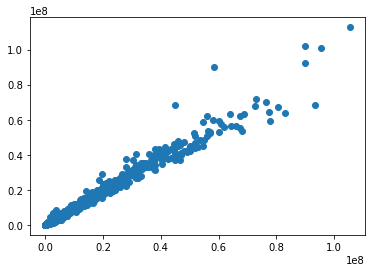

In [34]:
random_forest_scatter = plt.scatter (y_test , prediction_randomforest)


In [35]:
d = {'y_test' : y_test , 'predictions': prediction_randomforest}
df = pd.DataFrame(d)
df['difference'] = ((y_test - prediction_randomforest) / y_test) * 100
a = df['difference'].mean()
df.reset_index(inplace = True) #quitar el antiguo

print(f'Media de la diferencia entre predicción y valor real:{a}')

df.head()


#Saving visualisation for tableau

mainpath = "/home/jc/Escritorio/Data_source_final_project/"
filename ="prediction_randomforest."
fullpath = os.path.join(mainpath, filename)
df.to_csv(fullpath+"csv", index=False)

Media de la diferencia entre predicción y valor real:3.1867798559181018


In [36]:
df['predictions'].min()

13333.333333333334

In [37]:
df['predictions'].max()

112733333.33333333

# 5-Decision tree

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)


prediction_decision_tree = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, prediction_decision_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

#creating a dataframe with coeficients
display(pd.DataFrame(tree_reg.feature_importances_ , X_train.columns , columns = ['Coeff']).sort_values( by = ['Coeff'] , ascending = False).head(30))



score = r2_score(y_test, prediction_decision_tree)  
print('Accuracy:',format(score*100,'.2f'),'%')

Coeff
overall                      0.838721
potential                    0.102962
age                          0.021492
wage_eur                     0.009136
shooting                     0.007879
year                         0.007771
defending                    0.004320
dribbling                    0.001599
sofifa_id                    0.000820
passing                      0.000698
nation_jersey_number         0.000473
gk_reflexes                  0.000463
contract_valid_until         0.000380
height_cm                    0.000368
nationality_Italy            0.000331
weight_kg                    0.000327
physic                       0.000315
pace                         0.000170
skill_moves                  0.000152
team_jersey_number           0.000149
international_reputation     0.000139
nationality_Poland           0.000137
player_positions_CM, CDM     0.000109
player_positions_CM          0.000073
gk_handling                  0.000068
gk_diving                    0.000058
nationality_Ivory Coast      0.000056
gk_speed                     0.000056
player_positions_RB, RW, CM  0.000048
preferred_foot_Right         0.000048

Accuracy: 97.58 %


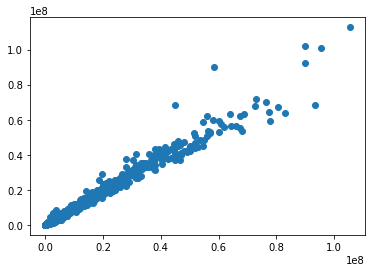

In [39]:
decision_tree_scatter = plt.scatter (y_test , prediction_randomforest)

In [40]:
d = {'y_test' : y_test , 'predictions': prediction_decision_tree}
df = pd.DataFrame(d)
df['difference'] = ((y_test - prediction_decision_tree) / y_test) * 100
a = df['difference'].mean()
df.reset_index(inplace = True) #quitar el antiguo

print(f'Media de la diferencia entre predicción y valor real:{a}')

df.tail()

#Saving visualisation for tableau

mainpath = "/home/jc/Escritorio/Data_source_final_project/"
filename ="prediction_decisiontree."
fullpath = os.path.join(mainpath, filename)
df.to_csv(fullpath+"csv", index=False)

Media de la diferencia entre predicción y valor real:3.1865881873804063


In [41]:
df['predictions'].min()

10000.0

In [42]:
df['predictions'].max()

123000000.0

# 6-Linear regression 

In [43]:
linear_reg = LinearRegression() #model that we are going to use
linear_reg.fit(X_train , y_train)

LinearRegression()

In [44]:
linear_reg.fit(X_train , y_train)

LinearRegression()

In [45]:
#creating a dataframe with coeficients
pd.DataFrame(linear_reg.coef_ , X_train.columns , columns = ['Coeff']).sort_values( by = ['Coeff'] , ascending = False).head()

Coeff
club_Czech Republic          7.143813e+13
club_Hebei China Fortune FC  6.841904e+13
club_Greece                  6.811259e+13
club_Peru                    6.769840e+13
club_FC Cincinnati           6.440789e+13

In [46]:
#passing the model values that he has never seen (X_test)

prediction_linear_reg = linear_reg.predict(X_test)

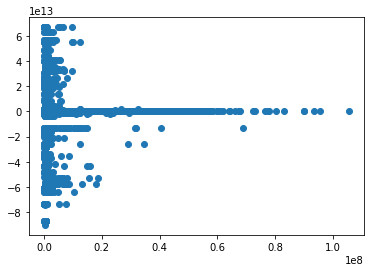

In [47]:
#Comparing our prediction to real values on a plot (visually)

plt.scatter (y_test , prediction_linear_reg)

In [48]:
d = {'y_test' : y_test , 'predictions': prediction_linear_reg}
df = pd.DataFrame(d)
df['difference'] = ((y_test - prediction_linear_reg) / y_test) * 100
a = df['difference'].mean()
df.reset_index(inplace = True) #quitar el antiguo

print(f'Media de la diferencia entre predicción y valor real:{a}')

df.tail()

#Saving visualisation for tableau

mainpath = "/home/jc/Escritorio/Data_source_final_project/"
filename ="prediction_linearreg."
fullpath = os.path.join(mainpath, filename)
df.to_csv(fullpath+"csv", index=False)

Media de la diferencia entre predicción y valor real:159999046.5765972


In [49]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, prediction_linear_reg)
metrics.mean_squared_error(y_test , prediction_linear_reg)
np.sqrt(metrics.mean_squared_error(y_test , prediction_linear_reg))
metrics.r2_score(y_test, prediction_linear_reg)

-4289289922488.189

In [50]:
score = r2_score(y_test, prediction_linear_reg)  
print('Accuracy:',format(score*100,'.2f'),'%')


#Saving visualisation for tableau

mainpath = "/home/jc/Escritorio/Data_source_final_project/"
filename ="prediction_linearreg."
fullpath = os.path.join(mainpath, filename)
df.to_csv(fullpath+"csv", index=False)

Accuracy: -428928992248818.88 %


# 7-Evaluating using Cross-Validation

In [51]:
scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)

Scores: [632259.26315358  21415.87064361 823581.98685257  41259.70656681
 845582.45987863 589275.10188084  37011.72076702 357586.85081415
  24662.46554304   6274.52979232]
Mean: 337890.995589256
Standard deviation: 336249.53401322523


In [53]:
lin_scores = cross_val_score(linear_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [1.30149052e+12 1.38908370e+06 4.68748569e+11 1.10764971e+06
 3.69985484e+12 1.55031685e+06 9.30122015e+05 3.55354491e+06
 1.37500494e+06 9.15088578e+05]
Mean: 547010474880.28845
Standard deviation: 1122956990673.269


In [54]:
tree_scores = cross_val_score(tree_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [ 938818.56310434   28951.42454783 1332131.49314047   56827.85484501
  806523.68901638  596473.16909243   40433.26105505    8506.13173322
       0.               0.        ]
Mean: 380866.55865347275
Standard deviation: 470892.42399709235


# 8-Fine-tune Model

## 8.1-Grid search

In [55]:
param_grid = [
    {'n_estimators': [3, 10, 40], 'max_features': [2, 3, 6]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 3, 6],
                          'n_estimators': [3, 10, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}

In [57]:
grid_search.best_estimator_


RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=10,
                      random_state=42)

In [58]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1915812.4431719168 {'max_features': 2, 'n_estimators': 3}
1436057.318283639 {'max_features': 2, 'n_estimators': 10}
1285648.3524911487 {'max_features': 2, 'n_estimators': 40}
1992773.1368048727 {'max_features': 3, 'n_estimators': 3}
1574136.4355772017 {'max_features': 3, 'n_estimators': 10}
1352638.7882899449 {'max_features': 3, 'n_estimators': 40}
1974991.4752705484 {'max_features': 6, 'n_estimators': 3}
1570315.1147666783 {'max_features': 6, 'n_estimators': 10}
1252690.392733366 {'max_features': 6, 'n_estimators': 40}
1627664.0625001418 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1106593.6146525901 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1875189.2728429835 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1306315.950747402 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
1623593.6614703063 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
1161279.6786869243 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [59]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2282244.9609267768

In [60]:
final_model_score = r2_score(y_test, final_predictions)  
print('Accuracy:',format(final_model_score*100,'.2f'),'%')


Accuracy: 83.49 %


In [61]:
'''  

import datetime
try:
    # for Python2
    from Tkinter import *   ## notice capitalized T in Tkinter
except ImportError:
    # for Python3
    from tkinter import *   ## notice lowercase 't' in tkinter here
Current_Date = datetime.datetime.today() 
Current_Date= str(Current_Date)

a = X_train.columns.values.tolist()
root=Tk()

root.title("Fifa tool prediction")
entries = []
cont=0

#label3 = Label(root, text= display(X_train.describe())).grid(row = 7 , column = 100 )
for y in (a):
       
    my_label = Label(root, text = a[cont] )
    my_label.grid(row = cont ,column= 4 , pady=20 )
    my_label.config(font=("Arial", 10))
    cont = cont +1

for i in range(len(a)):
    en = Entry(root)
    en.grid(row=i, column=0)
    entries.append(en)
    i = i +1

def execute():
    lista= []
    for entry in entries:
        #print(entry.get())
        lista.append(entry.get())
    #print(lista)
    df = pd.DataFrame(columns=a )
    df.loc[0] = lista
    display(df)
    print(type(df))
    prediction_randomforest = forest_reg.predict(df)
    prediction_randomforest = int(prediction_randomforest)
    display(prediction_randomforest)
    print(type(prediction_randomforest))
    
    label = Label(root, text= f'Hola, su programa ha sido ejecutado con éxito en el dia {Current_Date}').grid(row = 5 , column = 1000 )
    #label.config(font=("Arial", 12))
    label2 = Label(root, text= f'El valor de este jugador es:  {prediction_randomforest} €').grid(row = 7 , column = 1000 )
    
    

button=Button(root,text="Execute model",command=execute).grid(row = 10 , column = 1000 )

root.mainloop()

print("--- %s seconds ---" % (time.time() - start_time))

'''

'  \n\nimport datetime\ntry:\n    # for Python2\n    from Tkinter import *   ## notice capitalized T in Tkinter\nexcept ImportError:\n    # for Python3\n    from tkinter import *   ## notice lowercase \'t\' in tkinter here\nCurrent_Date = datetime.datetime.today() \nCurrent_Date= str(Current_Date)\n\na = X_train.columns.values.tolist()\nroot=Tk()\n\nroot.title("Fifa tool prediction")\nentries = []\ncont=0\n\n#label3 = Label(root, text= display(X_train.describe())).grid(row = 7 , column = 100 )\nfor y in (a):\n       \n    my_label = Label(root, text = a[cont] )\n    my_label.grid(row = cont ,column= 4 , pady=20 )\n    my_label.config(font=("Arial", 10))\n    cont = cont +1\n\nfor i in range(len(a)):\n    en = Entry(root)\n    en.grid(row=i, column=0)\n    entries.append(en)\n    i = i +1\n\ndef execute():\n    lista= []\n    for entry in entries:\n        #print(entry.get())\n        lista.append(entry.get())\n    #print(lista)\n    df = pd.DataFrame(columns=a )\n    df.loc[0] = lista\